In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from scipy.stats import ks_2samp
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# **Retrieve files**

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


# **Read CSV files**

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')

In [6]:
train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [8]:
#train = train.dropna()
train = train.drop_duplicates()
train.shape

(3116945, 22)

In [9]:
train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

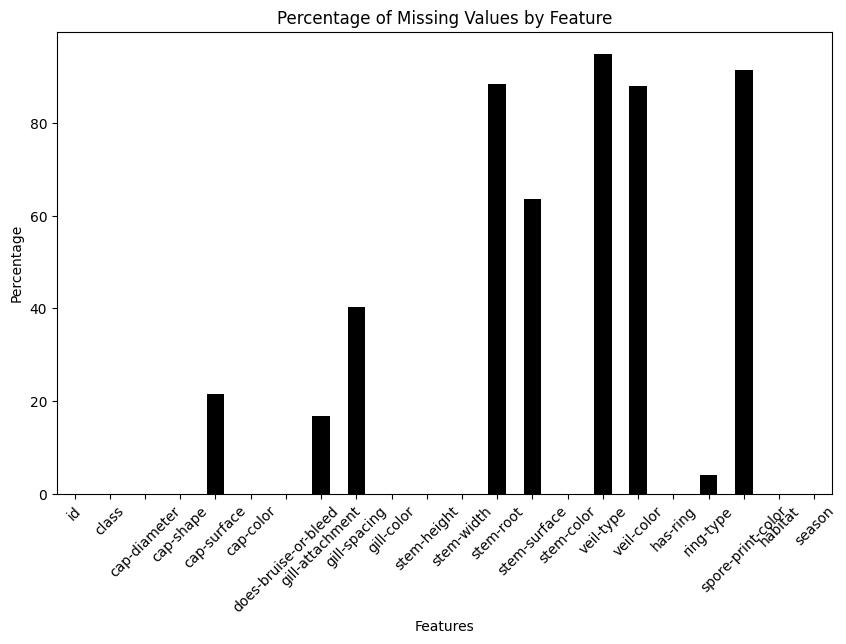

In [10]:
# Calculate missing values
missing_values_train = train.isnull().mean() * 100

# Plot
missing_values_train.plot(kind='bar', figsize=(10, 6), color='black')
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [11]:
for col in train:
    if train[col].dtype == 'int' or train[col].dtype == 'float':
        train[col].fillna(train[col].median(), inplace = True) 
    if train[col].dtype == 'object':
        train[col].fillna('not listed', inplace = True)
        
train.isna().sum()

/tmp/ipykernel_36/4049890674.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace = True)
/tmp/ipykernel_36/4049890674.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [12]:
test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [13]:
test.isna().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

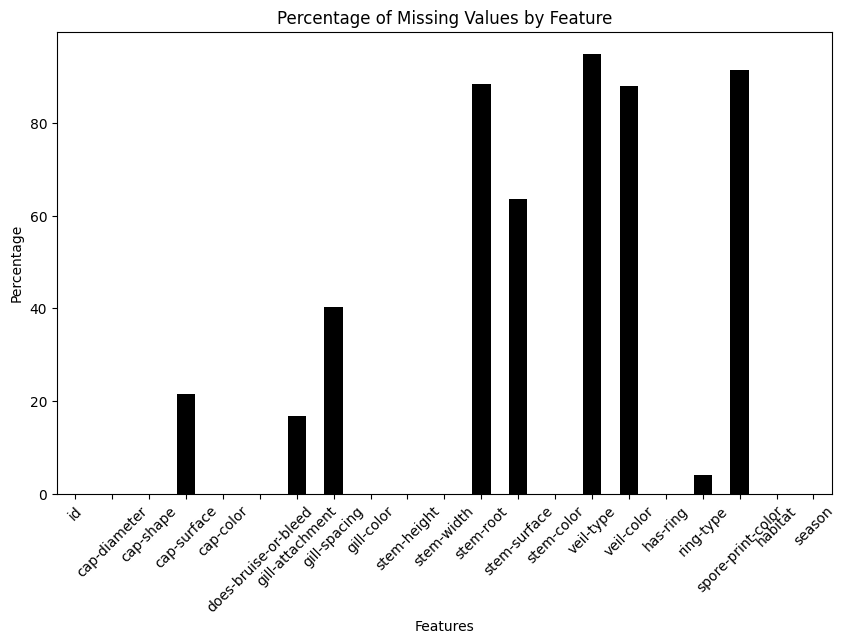

In [14]:
# Calculate missing values
missing_values_test = test.isnull().mean() * 100

# Plot
missing_values_test.plot(kind='bar', figsize=(10, 6), color='black')
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [15]:
for col in test:
    if test[col].dtype == 'int'or test[col].dtype == 'float':
        test[col].fillna(test[col].median(),inplace=True) 
    if test[col].dtype == 'object':
        test[col].fillna('not listed', inplace=True)
        
test.isna().sum()

/tmp/ipykernel_36/3859976436.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].median(),inplace=True)
/tmp/ipykernel_36/3859976436.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [16]:
submission

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e
...,...,...
2077959,5194904,e
2077960,5194905,e
2077961,5194906,e
2077962,5194907,e


# **Check to see if all columns are from the same distribution**

# **Drop id column**

In [17]:
train.drop('id', axis=1, inplace = True)
test.drop('id', axis=1, inplace = True)

# **Analyse target**

In [18]:
target = train.pop('class')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


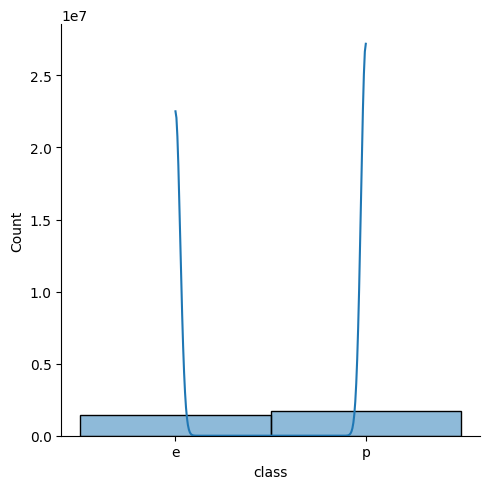

In [19]:
sns.displot(target, kde=True)

In [20]:
unique_values, counts = np.unique(target, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

e occurs 1411549 times
p occurs 1705396 times


In [21]:
to_drop = []

for col in test:
    stat, pv = ks_2samp(train[col], test[col])
    if pv < 0.05:
        to_drop.append(col)
print(to_drop)

train.drop(to_drop,axis=1,inplace=True)
test.drop(to_drop,axis=1,inplace=True)

[]


# **Encode target**

In [22]:
le = LabelEncoder()

target = le.fit_transform(target)
target

array([0, 1, 0, ..., 1, 0, 1])

# **Encode ordinal values**

In [23]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in train:
    if train[col].dtype == 'object':
        train[col] = enc.fit_transform(train[col].values.reshape(-1,1))
        test[col] = enc.transform(test[col].values.reshape(-1,1))

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             float64
 2   cap-surface           float64
 3   cap-color             float64
 4   does-bruise-or-bleed  float64
 5   gill-attachment       float64
 6   gill-spacing          float64
 7   gill-color            float64
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             float64
 11  stem-surface          float64
 12  stem-color            float64
 13  veil-type             float64
 14  veil-color            float64
 15  has-ring              float64
 16  ring-type             float64
 17  spore-print-color     float64
 18  habitat               float64
 19  season                float64
dtypes: float64(20)
memory usage: 475.6 MB


# **Heat map**

<Axes: >

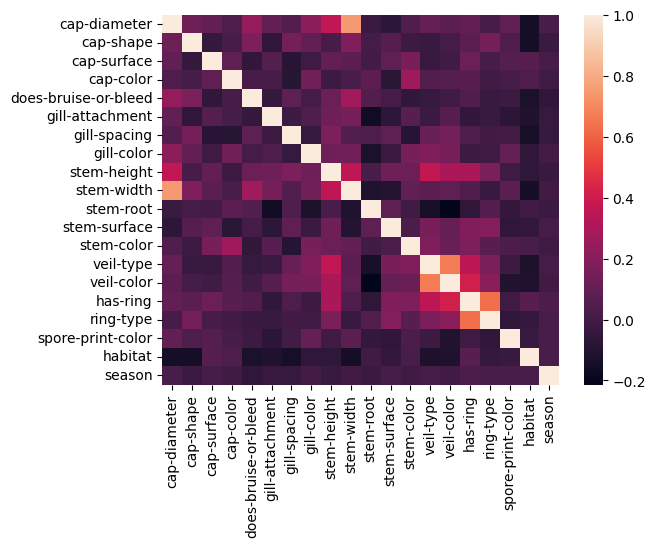

In [25]:
corr = train.corr()
sns.heatmap(corr)

# **Define X and y variables**

In [26]:
y = pd.Series(target)
X = train
X_test = test

# **Set class weights**

In [27]:
#weight_for_each_class= len(df) / (n_classes * n_samplesj)

def calc_class_weights(y):
  class_values = y.value_counts()
  num_classes = len(np.unique(y))

  weight = []
  for element in range(num_classes):
    class_weight = len(y) / (num_classes * class_values[element])
    weight.append(class_weight)

  class_weights = dict(zip(np.unique(y), weight))
  return class_weights

class_wt = calc_class_weights(y)
print(class_wt)

{0: 1.104086716082828, 1: 0.9138478687647913}


# **Normalise data**

In [28]:
X = (X - X.min()) / (X.max() - X.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

# **Split dataset into training and validation sets**

In [29]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.1, shuffle=True, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((2805250, 20), (2805250,), (311695, 20), (311695,), (2077964, 20))

# **Define model**

In [30]:
model = ExtraTreesClassifier(random_state=42, class_weight=class_wt).fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [31]:
y_pred = model.predict(X_val)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [32]:
acc = accuracy_score(y_val, y_pred)
acc

0.9918413834036478

In [33]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[140057,   1098],
       [  1445, 169095]])

In [34]:
df = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
2074353,0,0
2342417,1,1
2902423,1,1
3037232,0,0
1824838,0,0
...,...,...
2831129,0,0
1075360,0,0
775624,0,0
2996008,0,0


In [35]:
# Save the DataFrame to a CSV file
df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [36]:
print(f"Validation Accuracy: {acc}")
print("Confusion Matrix:")
print(cm)

Validation Accuracy: 0.9918413834036478
Confusion Matrix:
[[140057   1098]
 [  1445 169095]]


In [39]:
# Save the trained model to a file
joblib.dump(model, 'extratrees_model.pkl')
print("Model saved to extratrees_model.pkl")

Model saved to extratrees_model.pkl


# **Predict on test set**

In [ ]:
prediction = model.predict(X_test)
prediction

In [ ]:
prediction = le.inverse_transform(prediction)

sns.displot(prediction)

# **Prepare submission**

In [ ]:
submission['class'] = prediction
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

In [ ]:
print(train.describe())

# **Data Visualization**

# **Histograms**

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical features
train.hist(figsize=(10, 10), bins=30)
plt.show()

# **Box Plots**

In [ ]:
import seaborn as sns

# Plot box plots for all numerical features
for col in train.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=train[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# **Correlation Matrix**

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from scipy import stats

# Calculate z-scores for numerical features
z_scores = stats.zscore(train.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).any(axis=1)
print(f"Number of Outliers: {outliers.sum()}")
